# Titanic Shipwreck - Decision Tree

## Overview
```
PassengerId is the unique id of the row and it doesn't have any effect on target
Survived is the target variable we are trying to predict (0 or 1):
    1 = Survived
    0 = Not Survived
Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    1 = Upper Class
    2 = Middle Class
    3 = Lower Class
Name, Sex and Age are self-explanatory
SibSp is the total number of the passengers' siblings and spouse
Parch is the total number of the passengers' parents and children
Ticket is the ticket number of the passenger
Fare is the passenger fare
Cabin is the cabin number of the passenger
Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    C = Cherbourg
    Q = Queenstown
    S = Southampton
```

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/2 Titanic/Taitanic data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data

In [68]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [69]:
data.describe(include=["O"])      # just statistic for numeric data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [70]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

In [71]:
# Use mean to fill column Age NaN
data_Age = data['Age'] = data['Age'].fillna(data['Age'].mean())

In [72]:
# After drop "Cabin","Name","Ticket", just "Age" and "Embarked" have missing value. 
#"Age" filled, so now delete "Embarked" NaN becasue just has two, it doesn't effect the result.
data = data.dropna()
#data.info()

In [73]:
data['Embarked'].unique().tolist()

['S', 'C', 'Q']

In [74]:
# change 'S', 'C', 'Q' in "Embarked" to '0','1','2'
labels=data['Embarked'].unique().tolist()   
data['Embarked']= data['Embarked'].apply(lambda x: labels.index(x))      

In [75]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [87]:
data5=data.copy()
data5['Sex'].replace(["male","female"],[0,1],inplace=True)
data5["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 889, dtype: int64

In [76]:
data["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [83]:
# use 0,1 inplace female and male （bool）
#data['Sex'] = data['Sex'] == 'male' 
#data['Sex'] = (data['Sex'] == 'male').astype(int) 
#data["Sex"].replace(["male",0],["female",0])      it doesn't work
#data5['Sex'].replace(["male","female"],[0,1],inplace=True)   work
data.loc[(data['Sex']=="male"), 'Sex'] = 0
data.loc[(data['Sex']=="female"), 'Sex'] = 1
#data["Sex"]

In [85]:
#data.info()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [86]:
data.to_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/2 Titanic/data1-Nancy.csv")

# Correlation

In [160]:
survived = data['Survived'].value_counts()[1]
not_survived = data['Survived'].value_counts()[0]
survived_per = survived / data.shape[0] * 100
not_survived_per = not_survived / data.shape[0] * 100

In [161]:
print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, data.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, data.shape[0], not_survived_per))

340 of 889 passengers survived and it is the 38.25% of the training set.
549 of 889 passengers didnt survive and it is the 61.75% of the training set.


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


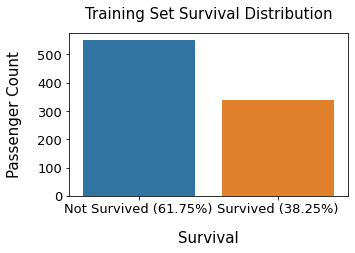

In [162]:
plt.figure(figsize=(5, 3))
sns.countplot(data['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

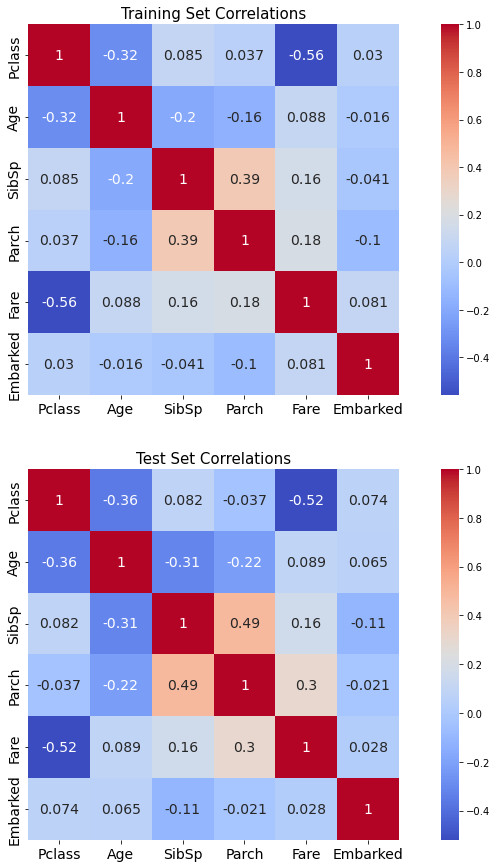

In [163]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(Xtrain.drop(['PassengerId',"Sex"], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(Xtest.drop(['PassengerId',"Sex"], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

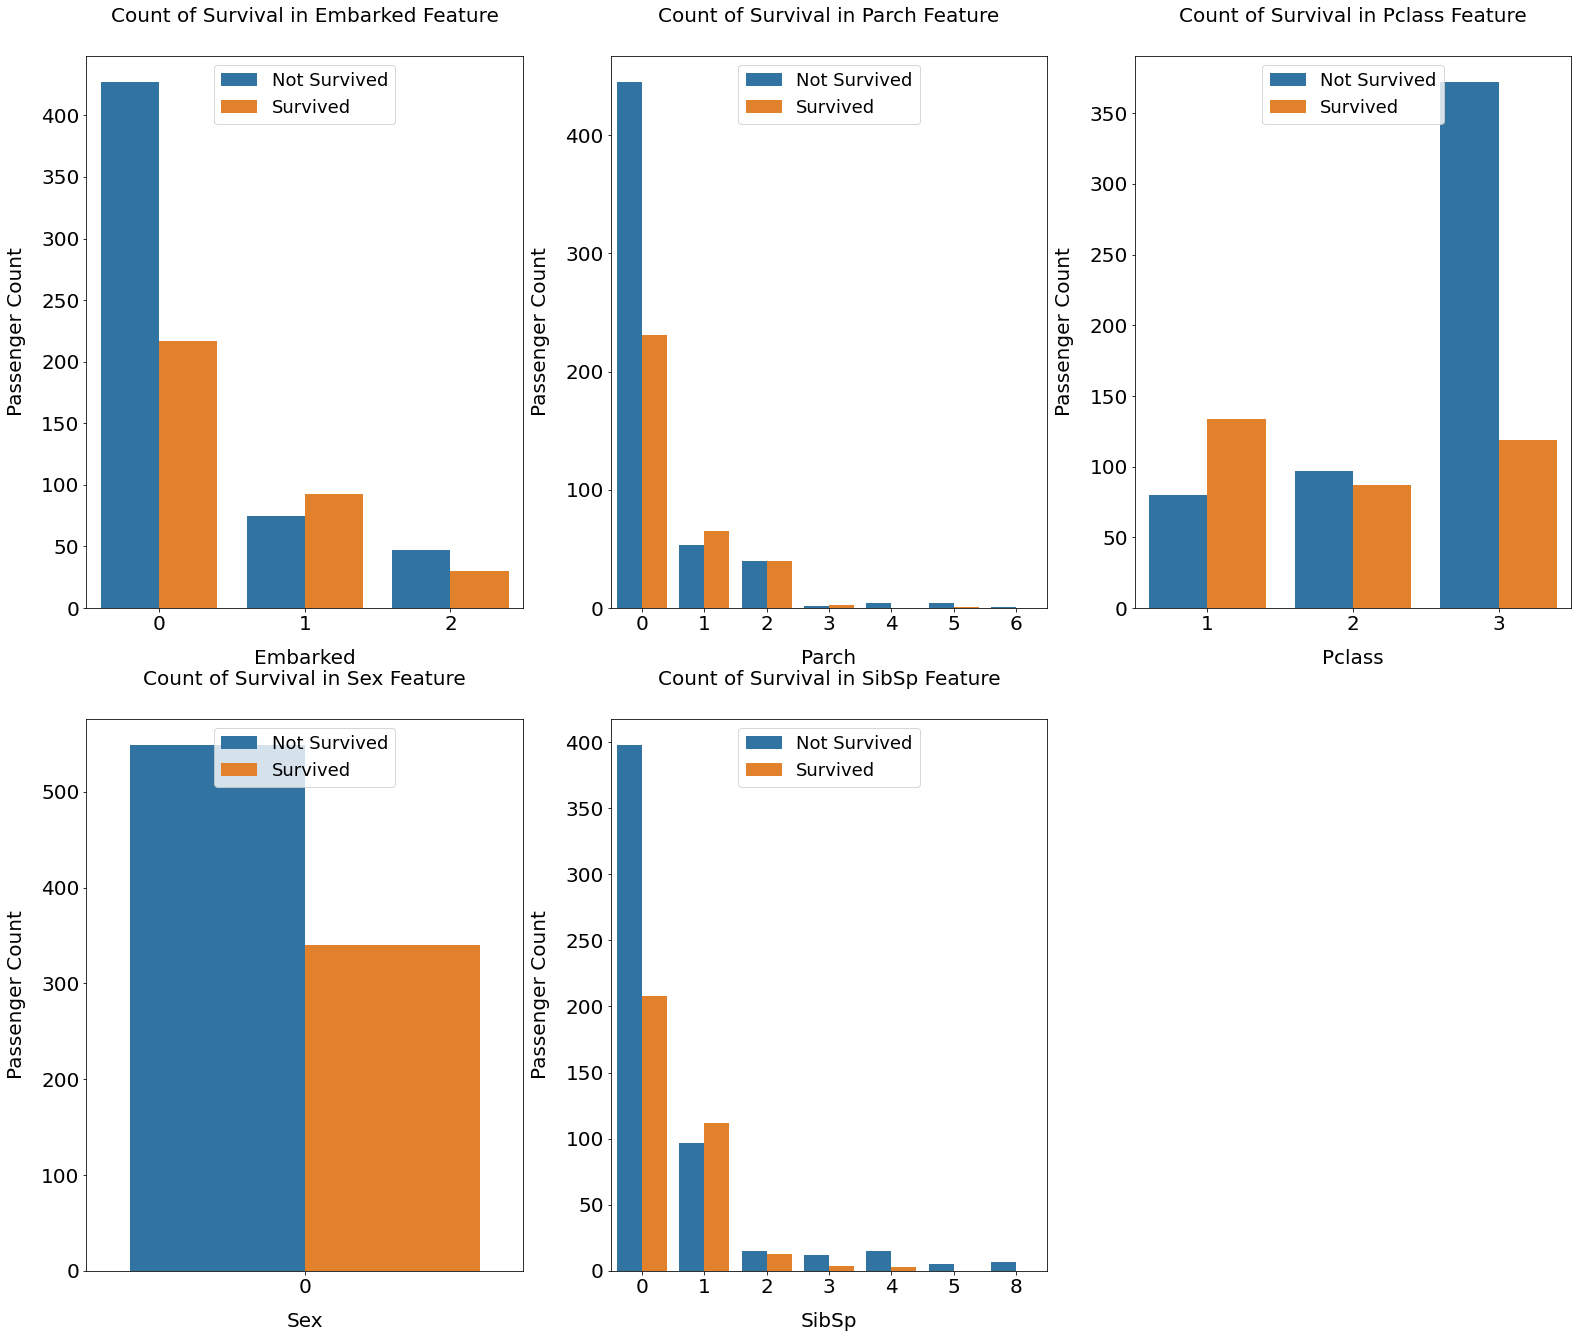

In [164]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

```
    we can see from the graphs:
    ·People from the Southampton survival rate lowest. Cherbourg board people chance to survive is highest.

    ·People with parent or children they survive rate higher than single.

    ·As we can see, class1 survival rate highest. Survival rates are getting lower when the class number increase.

    ·Female easier to surive than male.
```

### Fare

In [165]:
data1=data.copy()
data1['Fare'] = pd.qcut(data1['Fare'], 10)
#data1['Fare']

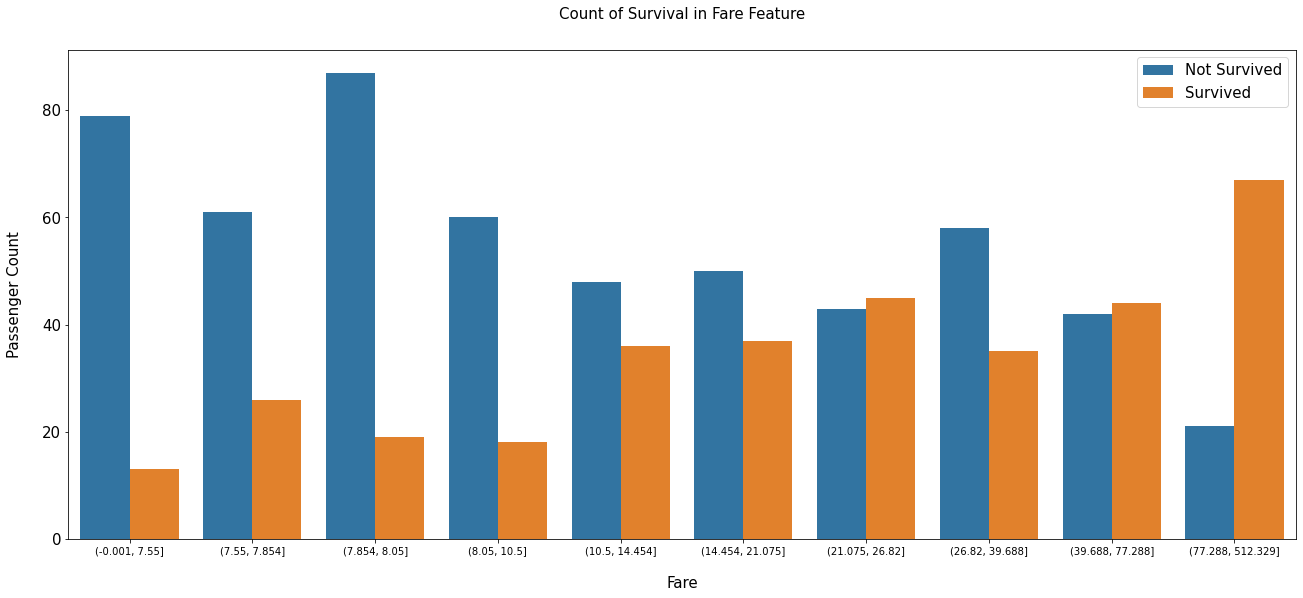

In [166]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

```
As we can see from the graph, survival rate increase when the fare increase.
```

### Age

In [203]:
data2=data.copy()
data2["Age"]= pd.qcut(data2['Age'], 10,duplicates='drop')

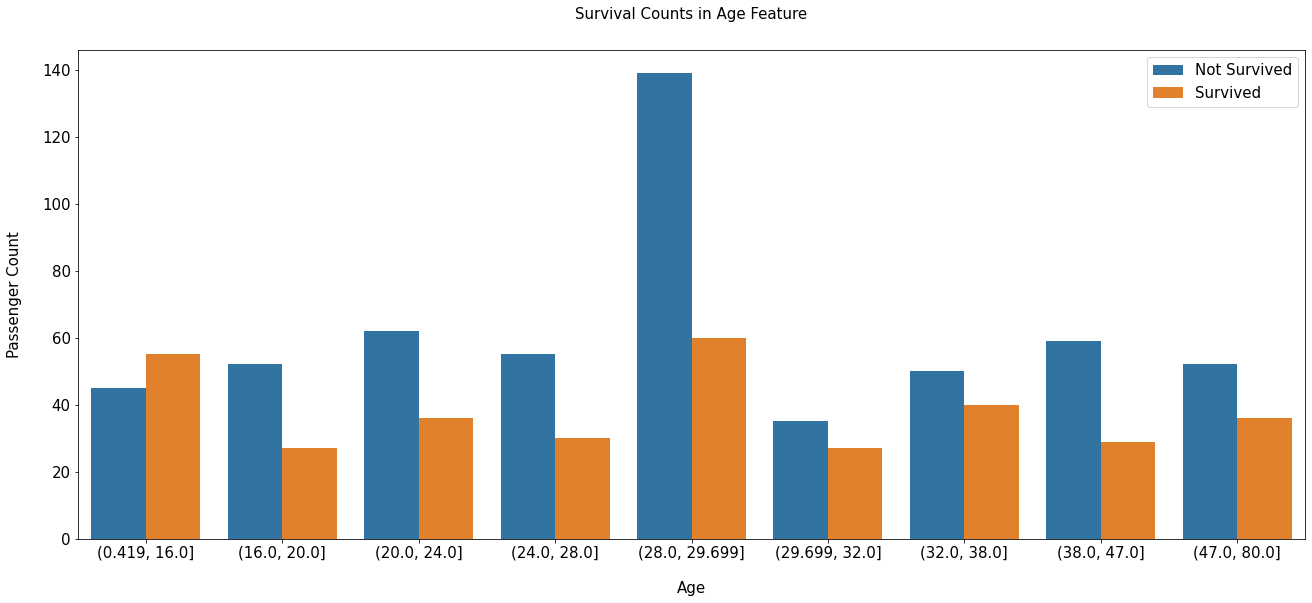

In [204]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=data2)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

```
· children are surival rate high.
· Not survival rate high between age 29-29
```

In [4]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64